# Kullback-Leibler Divergence a.k.a Relative Entropy

Given two probability distribution $p(x)$ and $q(x)$ over a discrete random variable $X$, the relative entropy  $D(p||q)$ is defined as follows:



$$
\begin{aligned}
D(p||q)=\sum_{x\in X} p(x) log{\frac{p(x)}{q(x)}}
\end{aligned}
$$



In [1]:
import numpy as np
from collections import defaultdict

dec = 2 #determines the number of bins

def listToRange(l):
    d = defaultdict(int)
    
    for i in range(0,len(l)):
        key = int(np.round(l[i]*10)) #d[key] stores number of numbers that rounded to key
        if key in d:
            d[key] += 1
        else:
            d[key] = 1   
            
    return d        

def entropyBins(l):
    d = listToRange(l)
    s = 0.0 
    
    for k in d:
        p = d[k]*1.0/len(l)
        s -= p*np.log(p)
        
    return s

def divergenceBins(l1, l2):
    #print(min(l1))
    #print(max(l1))
    #print(min(l2))
    #print(max(l2))
    
    #for i in l1:
    #    print(i, i*10, np.round(i*10), np.floor(i*10), np.ceil(i*10))
        
    d1 = listToRange(l1)
    d2 = listToRange(l2)
    s = 0.0
    
    #print(len(d1))
    #print(len(d2))
    #print(d1.keys())
    #print(d2.keys())
    #print(len(set(d1.keys())))
    #print(len(set(d2.keys())))
    #print(len(set(d1.keys()) | set(d2.keys())))
    
    for i in set(d1.keys()) | set(d2.keys()):
        #print(i, d1[i], d2[i])
        p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
        p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
        s += p1*np.log(p1/p2)
        
    #print(px)
    #print(qx)
    #print(s)
    
    return s
    

## Example 2

* For probabilistic distirubtion $p(x)$, generate 1000 numbers following normal distribution $N(\mu=0, \sigma=0.5)$.
* For probabilistic distirubtion $q(x)$, generate 1000 numbers following normal distribution $N(\mu=1, \sigma=0.5)$.


1. Plot $p(x)$ and $q(x)$ in a graph. 
2. Compute entropy of $p(x)$
3. Compute entropy of $q(x)$
4. Compute KL divergence $D(q||p)$
5. Compute KL divergence $D(p||q)$

Entropy of p is 3.000397
Entropy of q is 2.982359
KL Divergence p||q is 1.765243
KL Divergence q||p is 1.640348


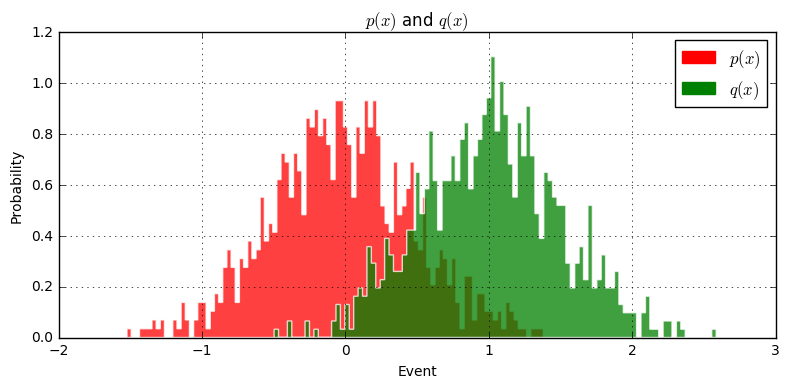

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(0)
p = np.random.normal(0, 0.5, 1000)
q = np.random.normal(1, 0.5, 1000)

print("Entropy of p is %f" %entropyBins(p))
print("Entropy of q is %f" %entropyBins(q))

print("KL Divergence p||q is %f" %divergenceBins(p,q))
print("KL Divergence q||p is %f" %divergenceBins(q,p))

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_title('$p(x)$ and $q(x)$')
ax.hist(p, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='r', alpha=0.75)
ax.hist(q, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='g', alpha=0.75)

plt.grid(True)

red_patch = mpatches.Patch(color='red', label='$p(x)$')
green_patch = mpatches.Patch(color='green', label='$q(x)$')
plt.legend(handles=[red_patch, green_patch])

fig.tight_layout()
plt.show()

## Example 3

* For probabilistic distirubtion $p(x)$, generate 1000 numbers following normal distribution $N(\mu=0, \sigma=0.5)$.
* For probabilistic distirubtion $q(x)$, generate 1000 numbers following normal distribution $N(\mu=0, \sigma=1)$.


1. Plot $p(x)$ and $q(x)$ in a graph. 
2. Compute entropy of $p(x)$
3. Compute entropy of $q(x)$
4. Compute KL divergence $D(q||p)$
5. Compute KL divergence $D(p||q)$

Entropy of p is 3.000397
Entropy of q is 3.643850
KL Divergence p||q is 0.270339
KL Divergence q||p is 0.395484


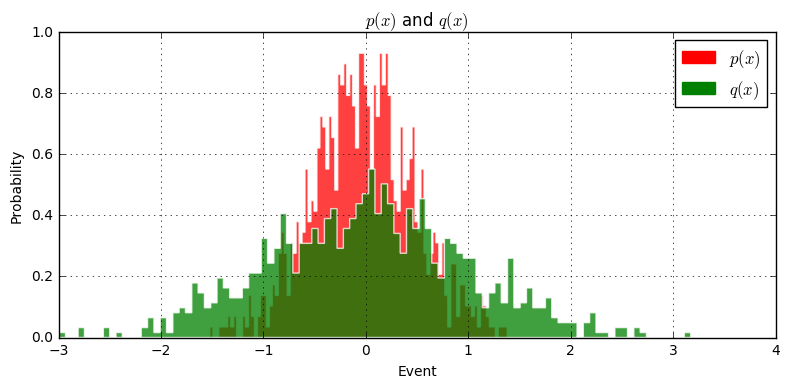

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(0)
p = np.random.normal(0, 0.5, 1000)
q = np.random.normal(0, 1, 1000)

print("Entropy of p is %f" %entropyBins(p))
print("Entropy of q is %f" %entropyBins(q))

print("KL Divergence p||q is %f" %divergenceBins(p,q))
print("KL Divergence q||p is %f" %divergenceBins(q,p))

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_title('$p(x)$ and $q(x)$')
ax.hist(p, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='r', alpha=0.75)
ax.hist(q, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='g', alpha=0.75)

plt.grid(True)

red_patch = mpatches.Patch(color='red', label='$p(x)$')
green_patch = mpatches.Patch(color='green', label='$q(x)$')
plt.legend(handles=[red_patch, green_patch])

fig.tight_layout()
plt.show()

## Example 4

* For probabilistic distirubtion $p(x)$, generate 1000 numbers following normal distribution $N(\mu=0, \sigma=0.5)$.
* For probabilistic distirubtion $q(x)$, generate 1000 numbers following normal distribution $N(\mu=0, \sigma=0.5)$.


1. Plot $p(x)$ and $q(x)$ in a graph. 
2. Compute entropy of $p(x)$
3. Compute entropy of $q(x)$
4. Compute KL divergence $D(q||p)$
5. Compute KL divergence $D(p||q)$

Entropy of p is 3.000397
Entropy of q is 2.982359
KL Divergence p||q is 0.021661
KL Divergence q||p is 0.021145


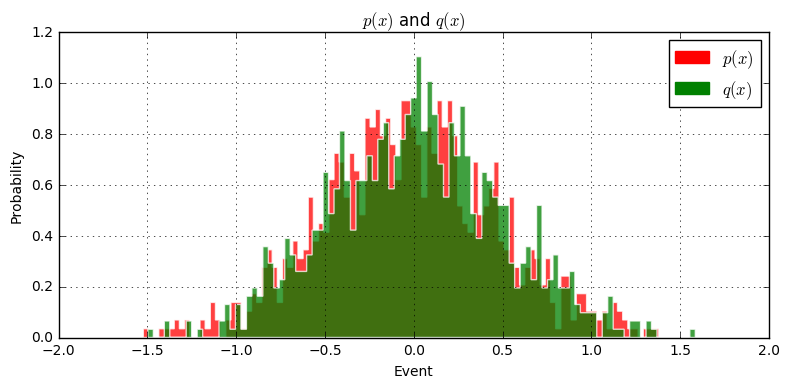

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(0)
p = np.random.normal(0, 0.5, 1000)
q = np.random.normal(0, 0.5, 1000)

print("Entropy of p is %f" %entropyBins(p))
print("Entropy of q is %f" %entropyBins(q))

print("KL Divergence p||q is %f" %divergenceBins(p,q))
print("KL Divergence q||p is %f" %divergenceBins(q,p))

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_title('$p(x)$ and $q(x)$')
ax.hist(p, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='r', alpha=0.75)
ax.hist(q, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='g', alpha=0.75)

plt.grid(True)

red_patch = mpatches.Patch(color='red', label='$p(x)$')
green_patch = mpatches.Patch(color='green', label='$q(x)$')
plt.legend(handles=[red_patch, green_patch])

fig.tight_layout()
plt.show()